In [1]:
import pandas as pd

In [6]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [13]:
iris.keys()
df=iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [17]:
df['target_name']=df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

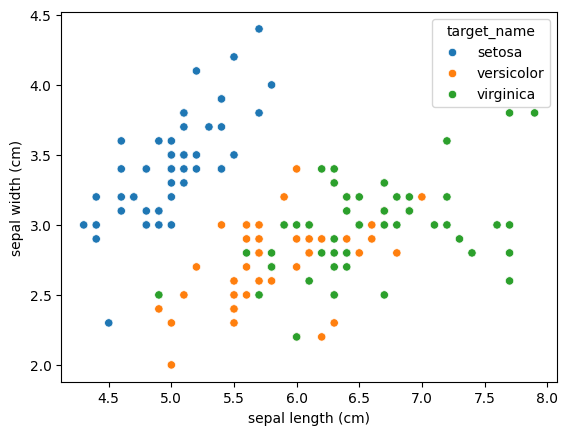

In [21]:
sns.scatterplot(df,x=df['sepal length (cm)'],y=df['sepal width (cm)'],hue=df['target_name'])

In [26]:
from sklearn.model_selection import train_test_split
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=df['target']

In [30]:
#splitting the data and model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [31]:
#model fitting
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<Axes: >

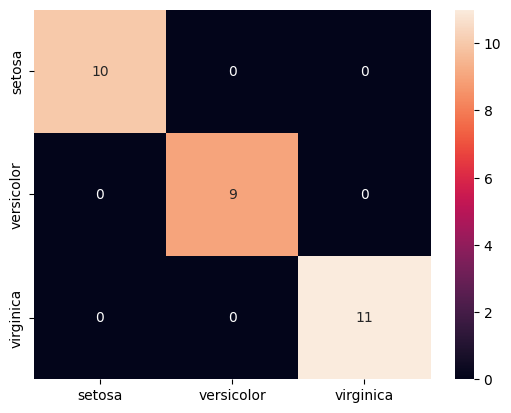

In [43]:
sns.heatmap(cm,annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names)